# Project - Bank Personal Loan 

### Author : Ashish Johnson

### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

### Attribute Information:
<b>ID:</b> Customer ID <br/>
<b>Age:</b> Customer's age in completed years<br/>
<b>Experience:</b> #years of professional experience<br/>
<b>Income:</b> Annual income of the customer (thousand dollars)<br/>
<b>ZIP Code:</b> Home Address ZIP code.<br/>
<b>Family:</b> Family size of the customer<br/>
<b>CCAvg:</b> Avg. spending on credit cards per month (thousand dollars)<br/>
<b>Education:</b> Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br/>
<b>Mortgage:</b> Value of house mortgage if any. (thousand dollars)<br/>
<b>Personal Loan:</b> Did this customer accept the personal loan offered in the last campaign?<br/>
<b>Securities Account:</b>Does the customer have a securities account with the bank?<br/>
<b>CD Account:</b> Does the customer have a certificate of deposit (CD) account with the bank?<br/>
<b>Online:</b> Does the customer use internet banking facilities?<br/>
<b>Credit card:</b> Does the customer use a credit card issued by bank

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### 1.1  Import the necessary libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats 

%matplotlib inline
sns.set(color_codes = True)

### 1.2 Read the data as a data frame

In [167]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

### 1.3 Let's see the shape of the data-frame

In [168]:
df.shape

(5000, 14)

So there are <b>5000 records (rows)</b> and <b>14 columns</b> 

In [169]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### 1.4 Lets look at the data type of each attribute

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<b>The 13 independent and 1 dependent variable are all numerical</b> 

### 1.5 Let's look at the 5 point summary of the attributes

In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<b>Observations :</b> </font> <br/>
1. '<b>Experience</b>' attribute has data anomaly in that it has negative values <br/>
2. Average age of customers in the dataset is 45 years <br/>
3. No missing values in the data set

### 1.6 Let's confirm there are no missing values

In [172]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<b>There are indeed no missing values in any of the columns of the data-set</b> 

## 2. Let's study the data distribution in each attribute

First we will look at the data distribution of the <b>continuous attributes</b> of the data-set

### 2.1 Data Distribution of 'ID' attribute

Mean   :  2500.5 
Median :  2500.5 
Mode   :  1


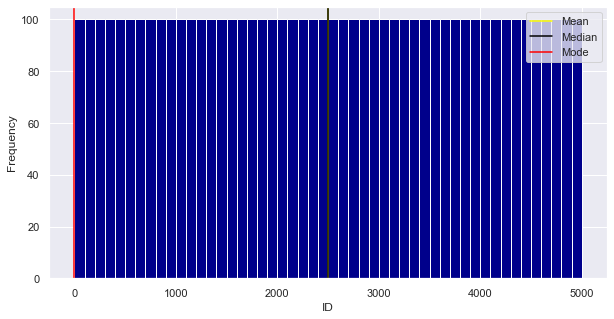

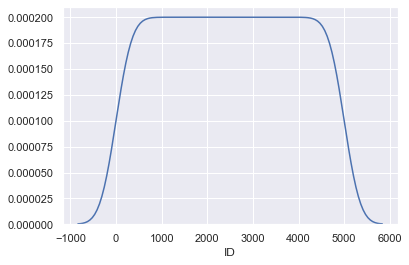

In [173]:
mean  = df['ID'].mean()
median= df['ID'].median()
mode  = df['ID'].mode()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['ID'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('ID')                                 # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['ID'], kde = True, hist = False);

<b>This attribute is used to uniquely identify customers. Does not have any impact on the dependent variable.</b> 

### 2.2 Data Distribution of 'Age' attribute

Mean   :  45.3384 
Median :  45.0 
Mode   :  35
Std Deviation :  11.463165630542692


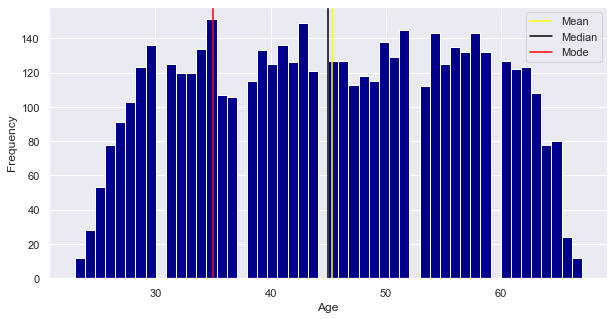

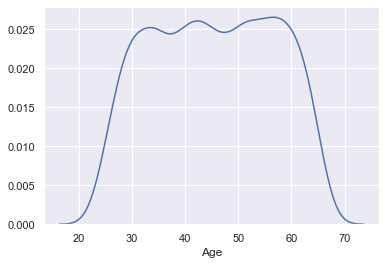

In [174]:
mean  = df['Age'].mean()
median= df['Age'].median()
mode  = df['Age'].mode()
std   = df['Age'].std()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])
print('Std Deviation : ', std)

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['Age'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Age')                                 # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['Age'], kde = True, hist = False);

<b>The mean age of the customers is 45 years with standard deviation of 11.46</b>  <br/>
<b>There are 3 prominent peaks and the distribution is fairly normal</b>

### 2.3 Data Distribution of 'Experience' attribute

Mean   :  20.1046 
Median :  20.0 
Mode   :  32
Std Deviation :  11.467953681120571


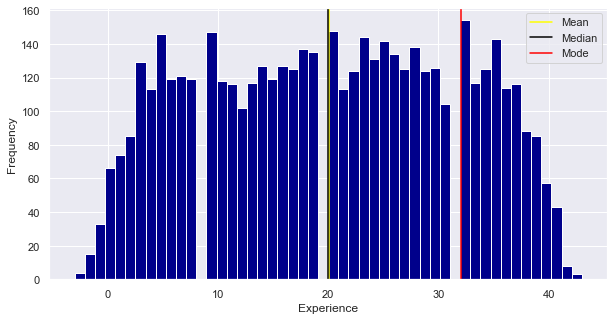

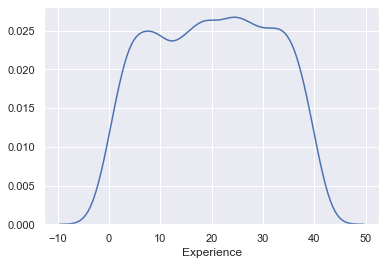

In [175]:
mean  = df['Experience'].mean()
median= df['Experience'].median()
mode  = df['Experience'].mode()
std   = df['Experience'].std()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])
print('Std Deviation : ', std)

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['Experience'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Experience')                                 # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['Experience'], kde = True, hist = False);


<b>Visibly some data is inconsistent in that the experience cannot be negative</b> <br/>
<b>Seems to have normal distribution</b><br/>
<b>Data Imputation is needed to handle negative experience values</b>

### 2.4 Data Distribution of 'Income' attribute

Mean   :  73.7742 
Median :  64.0 
Mode   :  44
Std Deviation :  46.033729321086334


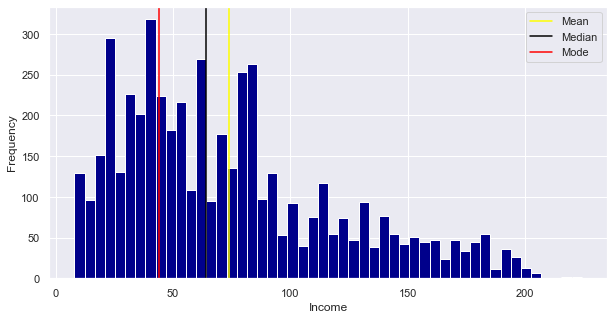

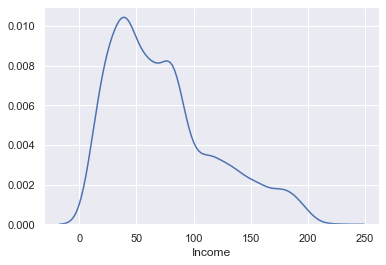

In [176]:
mean  = df['Income'].mean()
median= df['Income'].median()
mode  = df['Income'].mode()
std   = df['Income'].std()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])
print('Std Deviation : ', std)

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['Income'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Income')                                 # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['Income'], kde = True, hist = False);

<b>The mean annual income is $73.77K with standard deviation of 46</b><br/>
<b>The Income as obtained from the data-set is positively skewed</b> 

### 2.5 Data Distribution of 'ZIP Code' attribute

Mean   :  93152.503 
Median :  93437.0 
Mode   :  94720


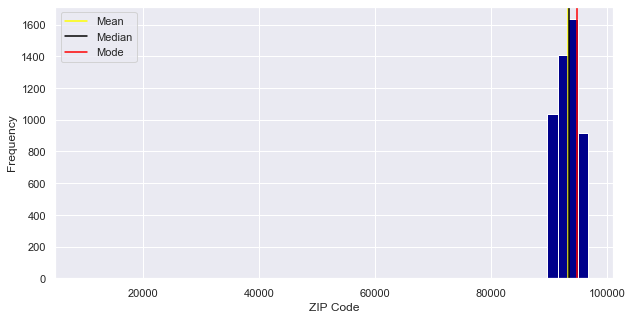

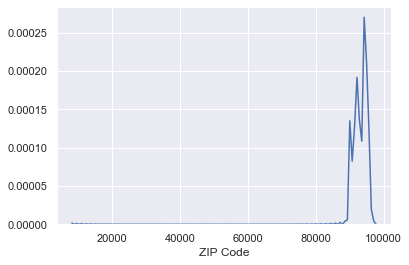

In [177]:
mean  = df['ZIP Code'].mean()
median= df['ZIP Code'].median()
mode  = df['ZIP Code'].mode()
std   = df['ZIP Code'].std()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])
#print('Std Deviation : ', std)

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['ZIP Code'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('ZIP Code')                                 # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['ZIP Code'], kde = True, hist = False);

<b>ZIP code is just the region code and does not likely to influence the dependent variable</b>  <br/>
<b>The minimun value of 9307 as seen from 5 point summary seems to be an erraneous record in the data-set</b> 

### 2.6 Data Distribution of 'CCAvg' attribute

Mean   :  1.9379380000000053 
Median :  1.5 
Mode   :  0.3
Std Deviation :  1.7476589800467723


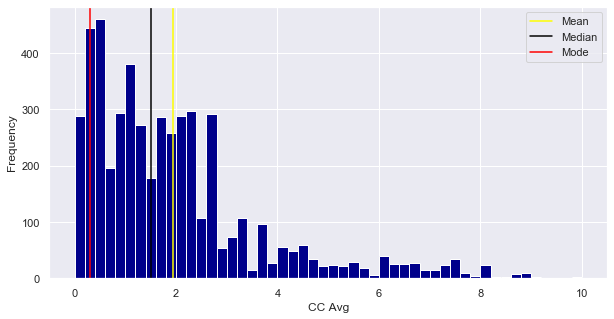

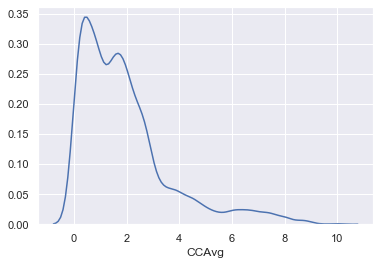

In [178]:
mean  = df['CCAvg'].mean()
median= df['CCAvg'].median()
mode  = df['CCAvg'].mode()
std   = df['CCAvg'].std()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])
print('Std Deviation : ', std)

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['CCAvg'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('CC Avg')                                 # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['CCAvg'], kde = True, hist = False);

<b>The mean of monthly Avg expenditure on Credit Card is $1.93K with Std Deviation of 1.74</b> <br/>
<b>The data distribution is positively skewed</b> 

### 2.7 Data Distribution of 'Mortgage' attribute


Mean   :  56.4988 
Median :  0.0 
Mode   :  0
Std Deviation :  101.713802102109


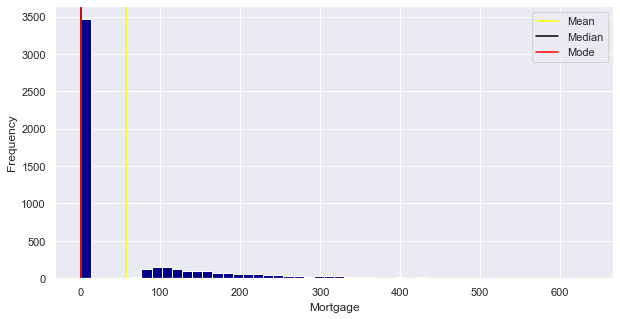

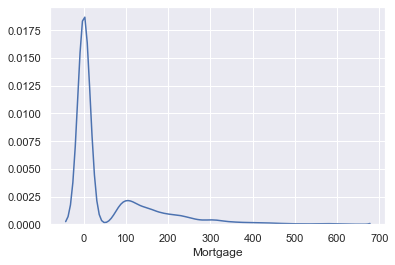

In [179]:
mean  = df['Mortgage'].mean()
median= df['Mortgage'].median()
mode  = df['Mortgage'].mode()
std   = df['Mortgage'].std()

print('Mean   : ',mean,'\nMedian : ',median,'\nMode   : ',mode[0])
print('Std Deviation : ', std)

plt.figure(figsize=(10,5))                        # set the figure size
plt.hist(df['Mortgage'],bins=50,color='darkblue')      #Plot the histogram

plt.axvline(mean,color='yellow',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='black',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Mortgage')                            # label the x-axis
plt.ylabel('Frequency')                           # label the y-axis
plt.legend()                                      # Plot the legend
plt.show()

sns.distplot(df['Mortgage'], kde = True, hist = False);

<b>The mean value of House Mortgage is $56.49k but the Median is 0 indicating presence of outliers in the data-set</b> <br/>
<b>The standard deviation is 101 implying there are a lot of outliers</b><br/>
<b>The data is Positively skewed</b> <br/>
<b>The mode is 0 implying most customers have no mortgage</b>

<br/><br/>Now let us study the data distribution of the <b>categorical attributes</b> of the data-set

### 2.8 Data Distribution of 'Education' attribute

1    2096
3    1501
2    1403
Name: Education, dtype: int64


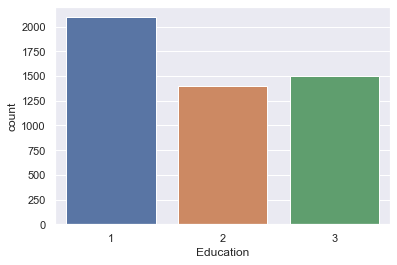

In [180]:
print (df['Education'].value_counts())

sns.countplot(df['Education']) ;

<b>Nearly 42% of the customers are Under-Graduates</b> <br/>
<b>28% of customers are Graduates</b> <br/>
<b>30% of the customers are Advanced Professionals</b>

### 2.9 Data Distribution of 'Family' attribute

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


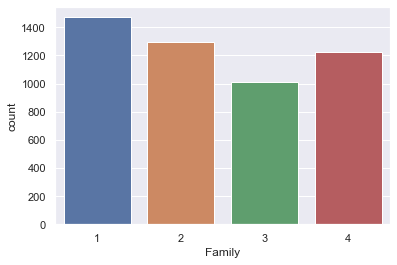

In [181]:
print (df['Family'].value_counts())

sns.countplot(df['Family']) ;

<b>Families with least member is highest in the sample, nearly 30% </b>

### 2.10 Data Distribution of 'Securities Account' attribute

0    4478
1     522
Name: Securities Account, dtype: int64


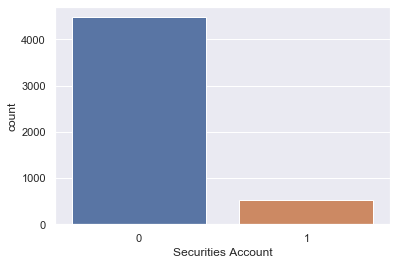

In [182]:
print (df['Securities Account'].value_counts())

sns.countplot(df['Securities Account']) ;

<b>Nearly 90% of the customers in the data-set do not have a Securities account with the bank</b>

### 2.11 Data Distribution of 'CD Account' attribute

0    4698
1     302
Name: CD Account, dtype: int64


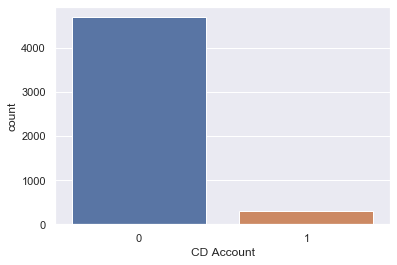

In [183]:
print (df['CD Account'].value_counts())

sns.countplot(df['CD Account']) ;

<b>Nearly 94% of the customers in the data-set do not have a certificate of deposit (CD) account with the bank</b>

### 2.12 Data Distribution of 'Online' attribute

1    2984
0    2016
Name: Online, dtype: int64


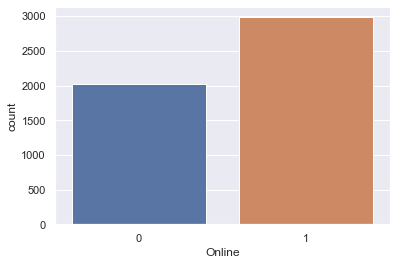

In [184]:
print (df['Online'].value_counts())

sns.countplot(df['Online']) ;

<b>Nearly 60% of the customers in the data-set use the online banking facility offerred by the bank</b> 

### 2.13 Data Distribution of 'CreditCard' attribute

0    3530
1    1470
Name: CreditCard, dtype: int64


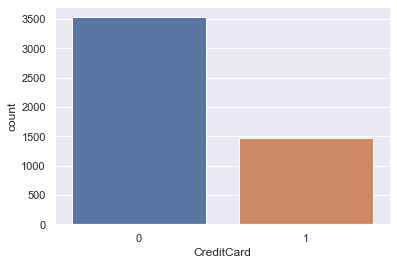

In [185]:
print (df['CreditCard'].value_counts())

sns.countplot(df['CreditCard']) ;

<b>Nearly 70% of the customers in the data-set do not hold credit card from the bank</b>

<br/><br/><b>We will not be reviewing the data distribution of 'Personal Loan' attribute here since that is the target or dependent variable.</b>

### 2.14 Pair Plot of all the attributes in the data-frame

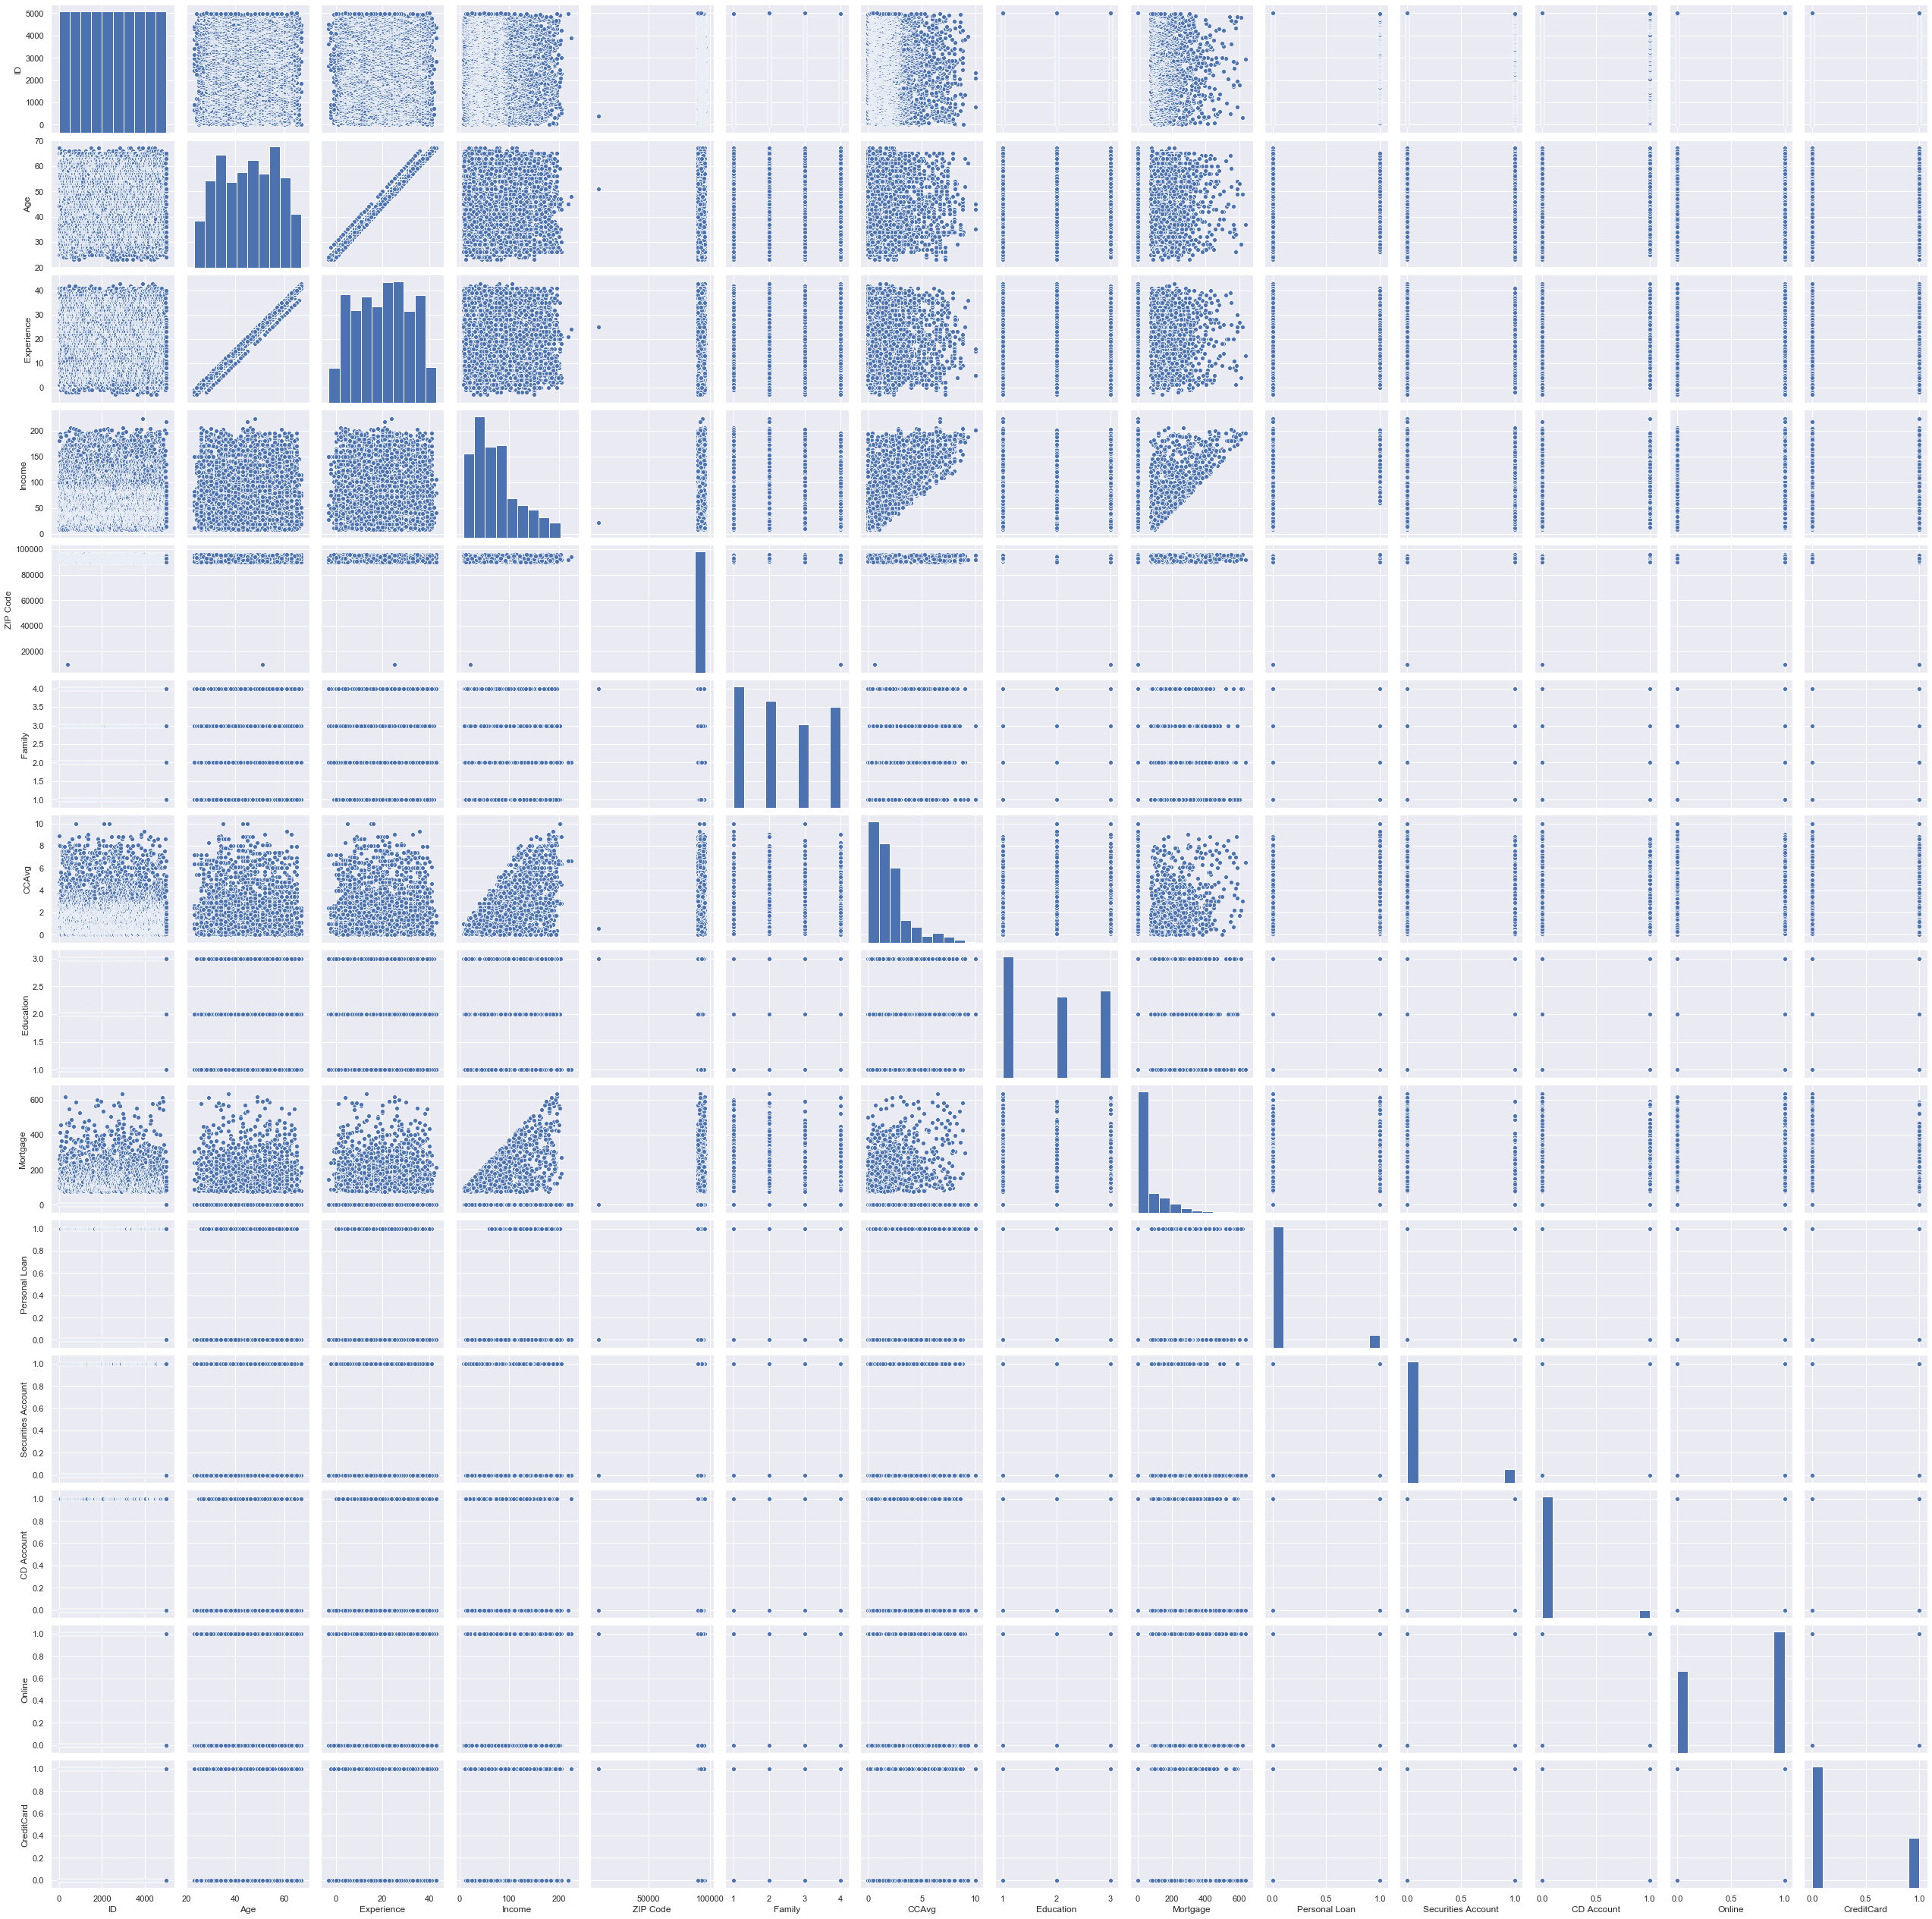

In [186]:
sns.pairplot(data = df, vars = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online','CreditCard']);

<b>Age and Experience attributes have a linear relationship</b>

### 2.15 Lets check the co-relation between the attributes

In [187]:
corr = df.corr()

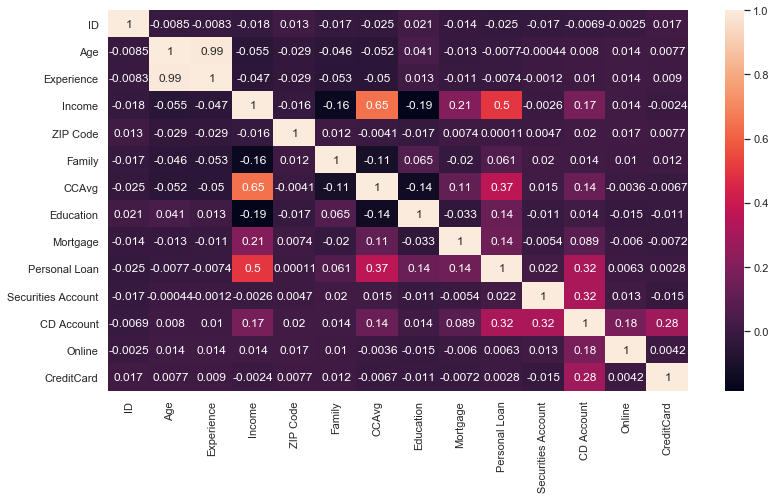

In [188]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5}) ;
plt.figure(figsize=(13,7))
sns.heatmap(corr, annot=True) ;

<b>Age and Experience attributes are highly correlated with the correlation co-efficient of 0.99</b> <br/>
<b>Income and avg Credit Card spending per month are also correlated with coefficient of 0.65</b><br/>
<b>Income and target column 'Personal Loan' seems to be decently correlated with correlation coefficient of 0.5</b><br/>

<br/><br/> <b>Summary of the data distribution analysis:</b><br/><br/>
<b>1. ID</b> - used to uniquely identify customers and does not have any impact on the dependent variable. Follows a normal distribution and can be conveniently dropped.<br/><br/>
<b>2. Age</b> - The mean age of the customers is 45 years with standard deviation of 11.46 and there are 3 prominent peaks while the distribution is fairly normal <br/><br/>
<b>3. Experience</b> - Has a normal distribution and is highly correlated with Age attribute. Contains negative values which needs pre-processing<br/><br/>
<b>4. Income</b> - The Income is positively skewed with mean annual income of \$73.77K and standard deviation of 46<br/><br/>
<b>5. ZIP Code</b> - ZIP code is just the region code and does not likely to influence the dependent variable. The minimun value of 9307 as seen from 5 point summary seems to be an erroneous record in the data-set<br/><br/>
<b>6. Family</b> - Families with least member is highest in the sample, nearly 30% <br/><br/>
<b>7. CCAvg</b> - The data distribution is positively skewed with the mean of monthly Avg expenditure on Credit Card being \$1.93K and std deviation of 1.74<br/><br/>
<b>8. Education</b> - Nearly 42% of the customers are Under-Graduates, 28% of customers are Graduates, 30% of the customers are Advanced Professionals <br/><br/>
<b>9. Mortgage</b> - The mean value of House Mortgage is \$56.49k but the Median is 0 and std deviation is 101 implying high presence of outliers for this attribute. The mode is 0 implying most customers have no mortgage <br/><br/>
<b>10. Securities Account</b> - Nearly 90% of the customers in the data-set do not have a Securities account with the bank<br/><br/>
<b>11. CD Account</b> - Nearly 94% of the customers in the data-set do not have a certificate of deposit (CD) account with the bank<br/><br/>
<b>12. Online</b> - Nearly 60% of the customers in the data-set use the online banking facility offered by the bank<br/><br/>
<b>13. CreditCard</b> - Nearly 70% of the customers in the data-set do not hold credit card from the bank<br/>

## 3. Now let's look at the data distribution of target column

0    4520
1     480
Name: Personal Loan, dtype: int64


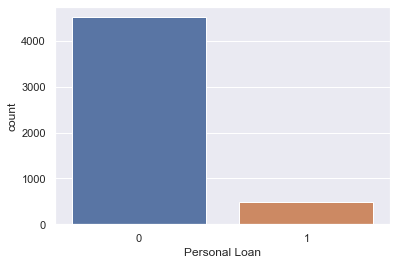

In [189]:
print (df['Personal Loan'].value_counts())

sns.countplot(df['Personal Loan']) ;

<b>Nearly 90% of the customers in the data-set didn't avail the Personal Loan offered by the Bank in the previous campaign. This is consistent with the problem description that only 9.6% of the customers in the dataset availed loan in the previous campaign.</b>

### 3.1 Lets study the impact of dependent variables on the target variable

In [190]:
df.groupby(df['Personal Loan']).mean().T

Personal Loan,0,1
ID,2512.165487,2390.650000
Age,45.367257,45.066667
Experience,20.132301,19.843750
Income,66.237389,144.745833
ZIP Code,93152.428761,93153.202083
Family,2.373451,2.612500
CCAvg,1.729009,3.905354
Education,1.843584,2.233333
Mortgage,51.789381,100.845833
Securities Account,0.102212,0.125000


<b>Observations :</b><br/><br/>
<b>1. The avg income of customers who took loan in previous campaign is more than double the avg income of customers who didn't avail the loan</b><br/><br/>
<b>2. The avg credit card spending per month of customers who took loan in previous campaign is slightly more than double compared to those who didn't take the loan</b><br/><br/>
<b>3. The avg mortgage for loan availing customers is approximately double for the non availing customers</b>

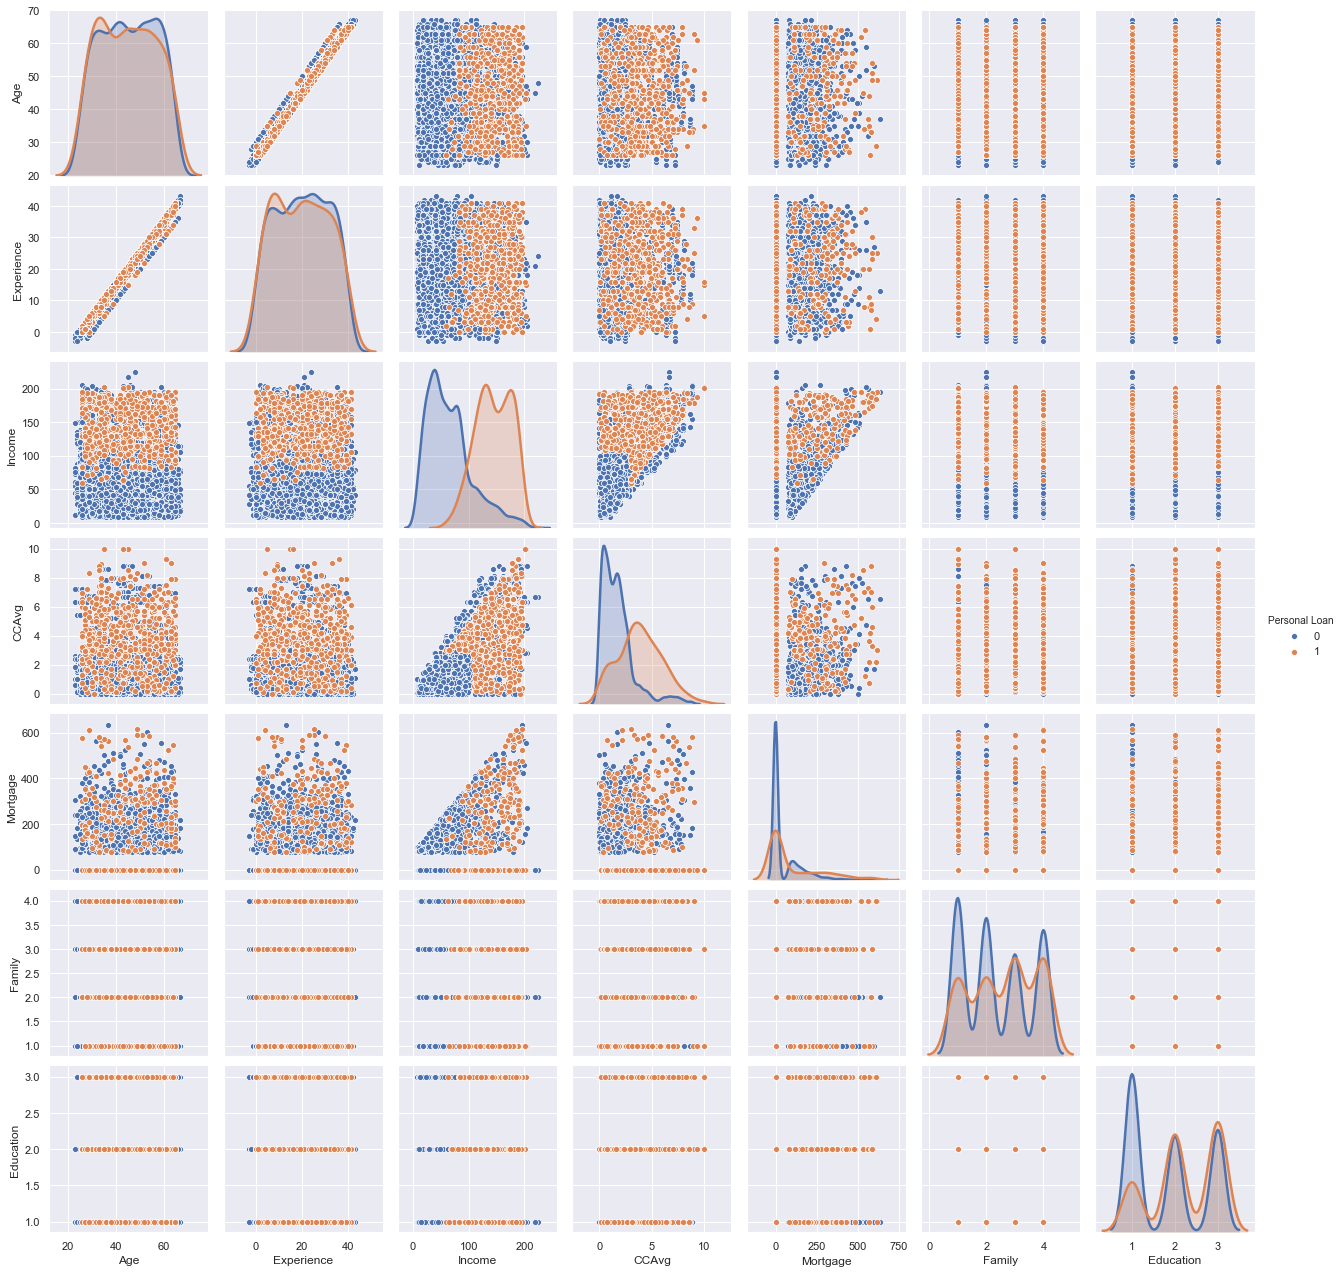

In [191]:
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education', 'Personal Loan']], 
             hue = 'Personal Loan', diag_kind = 'kde');

<br/><br/>
## 4. Let's now split the data into Training and Test sets

### 4.1 Make a copy of the Original Data-Frame

In [192]:
df_orig = df.copy()

### 4.2 Drop the attributes which do not impact the target column or is duplicate

In [193]:
df.drop('ID', axis = 1, inplace = True)
df.drop('ZIP Code', axis = 1, inplace = True)
df.drop('Experience', axis = 1, inplace = True)

In [194]:
df.shape

(5000, 11)

In [195]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

### 4.3 Check the outliers in the data

While studying the data distribution it was observed that 'Mortgage' column has a standard deviation of 101 which is significantly large implying presence of outliers in the data

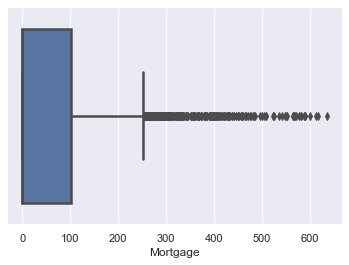

In [196]:
sns.boxplot(df['Mortgage']);

In [197]:
df['Mortgage_zscore'] = np.abs(stats.zscore(df['Mortgage']))
df_outliers = df[df['Mortgage_zscore'] >= 3]
print ("The value counts of target column for Outliers of Mortgage column is as follows: \n")
print (df_outliers['Personal Loan'].value_counts())
df.drop('Mortgage_zscore', axis = 1, inplace = True)

The value counts of target column for Outliers of Mortgage column is as follows: 

0    58
1    47
Name: Personal Loan, dtype: int64


<b>So 47 out of 480 customers who took loan in previous campaign have outliers in Mortgage column. If we drop these records, then the loan availing customers will be down by 10%. Since the data-set of loan availaing customers is already small we will NOT be deleting these outlier records of Mortgage column</b>

In [198]:
df.shape

(5000, 11)

### 4.4 Split the data into training and test set in the ratio of 70:30 respectively

In [199]:
X = df.drop('Personal Loan', axis=1)     
y = df['Personal Loan']   

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [201]:
print ("Distribution of Personal Loan in Training Data Set :")
print ("==================================================== \n")
print (pd.DataFrame(y_train)['Personal Loan'].value_counts())
print ("")

Distribution of Personal Loan in Training Data Set :

0    3169
1     331
Name: Personal Loan, dtype: int64



In [202]:
print ("Distribution of Personal Loan in Test Data Set :")
print ("================================================ \n")
print (pd.DataFrame(y_test)['Personal Loan'].value_counts())
print ("")

Distribution of Personal Loan in Test Data Set :

0    1351
1     149
Name: Personal Loan, dtype: int64



### 4.5 Check the distribution of target columns in Training and Test data-sets

In [203]:
print("Original customers who did not take loan : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("Original customers who took loan         : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("")
print("Training customers who did not take loan : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("Training customers who took loan         : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("")
print("Test customers who did not take loan     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("Test customers who took loan             : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("")

Original customers who did not take loan : 4520 (90.40%)
Original customers who took loan         : 480 (9.60%)

Training customers who did not take loan : 3169 (90.54%)
Training customers who took loan         : 331 (9.46%)

Test customers who did not take loan     : 1351 (90.07%)
Test customers who took loan             : 149 (9.93%)



## 5. Build Classification Models 

Now we will build different classification models using different algorithmns and evaluate the performance of each model.

### 5.1 Logistic Regression Classification Model

In [204]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver='liblinear')

In [205]:
# Fit the model on training data set
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
print ("Score of [Training] data set : ",round(log_reg_model.score(X_train, y_train),2))

Score of [Training] data set :  0.95


In [207]:
# Predict on test data set
log_reg_predict = log_reg_model.predict(X_test)

In [208]:
print ("Score of [Test] data set     : ",round(log_reg_model.score(X_test, y_test),2))

Score of [Test] data set     :  0.94


Accuracy of the model :  94.27 % 


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



[[1338   13]
 [  73   76]]




Text(30.5, 0.5, 'Actuals / Truth')

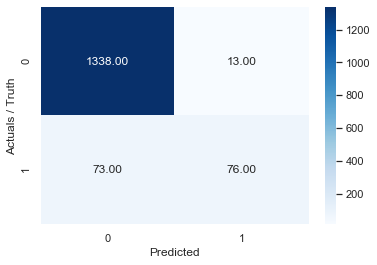

In [209]:
# Check the overall accuracy of the model
print ('Accuracy of the model : ', round(metrics.accuracy_score(y_test, log_reg_predict)*100,2), '% \n\n')

#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, log_reg_predict))
print ("\n")

#Print the Confusion matrix
cm = confusion_matrix(y_test, log_reg_predict)
print (cm)
print ("\n")

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The overall accuracy is 94% but the data is biased towards customers who didn't take the loan. We should be looking at recall of class - 1 which is 51% and that is not so good for predicting potential buyers of loan</b> <br/><br/>
<b>73 customers were predicted as non-buyers but they actual bought personal loan</b><br>
<b>13 customers were predicted as buyers of personal loan but they actually didn't take the loan</b>

### ROC curve

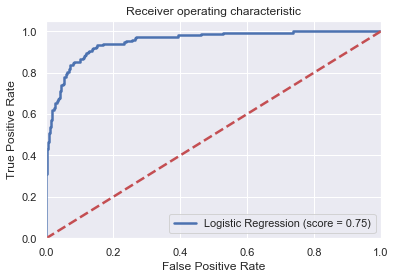



Area under the ROC curve :  95.23 %


In [210]:
from sklearn.metrics import roc_auc_score, roc_curve, auc 
logit_roc_auc = roc_auc_score(y_test, log_reg_predict)
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (score = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print ("\n\nArea under the ROC curve : ", round(auc(fpr, tpr)*100,2),'%')

### 5.2 Logistic Regression with Standard Scaler Classification Model

In [211]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()

xtrainsc = std_scaler.fit_transform(X_train)
xtestsc  = std_scaler.fit_transform(X_test)

In [212]:
# Fit the logistic regression model on scaled training data 
log_reg_std_model = LogisticRegression(solver='liblinear')
log_reg_std_model.fit(xtrainsc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
print ("Score of [Training] data set : ",round(log_reg_std_model.score(xtrainsc, y_train),2))

Score of [Training] data set :  0.95


In [214]:
# Predict on scaled test data set
log_reg_std_predict = log_reg_std_model.predict(xtestsc)

In [215]:
print ("Score of [Test] data set     : ",round(log_reg_std_model.score(xtestsc, y_test),2))

Score of [Test] data set     :  0.95


Accuracy of the model :  94.8 % 


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



[[1334   17]
 [  61   88]]




Text(30.5, 0.5, 'Actuals / Truth')

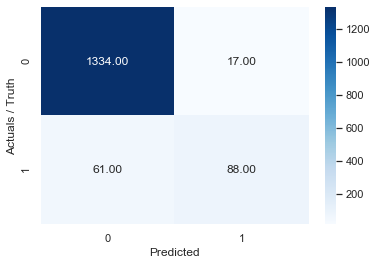

In [216]:
# Check the overall accuracy of the model on scaled data set
print ('Accuracy of the model : ', round(metrics.accuracy_score(y_test, log_reg_std_predict)*100,2), '% \n\n')

#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, log_reg_std_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, log_reg_std_predict)
print (cm)
print ('\n')

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The overall accuracy has increased marginally but the recall of class - 1 has increased from 51% to 59% after the data set was standardized</b><br/><br/>
<b>61 customers were predicted as non-buyers but they actual bought personal loan</b><br>
<b>17 customers were predicted as buyers of personal loan but they actually didn't take the loan</b>

### ROC curve

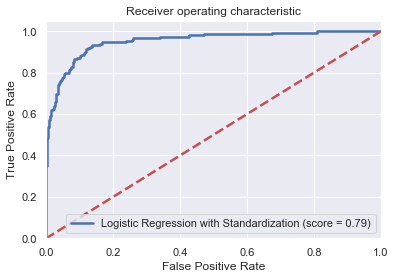



Area under the ROC curve :  95.36 %


In [217]:
from sklearn.metrics import roc_auc_score, roc_curve, auc 
logit_roc_auc1 = roc_auc_score(y_test, log_reg_std_predict)
fpr1, tpr1, thresholds1 = roc_curve(y_test, log_reg_std_model.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression with Standardization (score = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_Std')
plt.show()

print ("\n\nArea under the ROC curve : ", round(auc(fpr1, tpr1)*100,2),'%')

### 5.3 Naive Bayes Classification Model

In [218]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
GNB_model = GaussianNB()

# Fit the model on training data set
GNB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [219]:
print ("Score of [Training] data set  : ",round(GNB_model.score(X_train, y_train),2))

Score of [Training] data set  :  0.89


In [220]:
# Predict on test data set
GNB_test_predict = GNB_model.predict(X_test)

In [221]:
print ("Score of [Test] data set      : ",round(GNB_model.score(X_test, y_test),2))

Score of [Test] data set      :  0.87


Accuracy of the model :  87.47 % 


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



[[1227  124]
 [  64   85]]




Text(30.5, 0.5, 'Actuals / Truth')

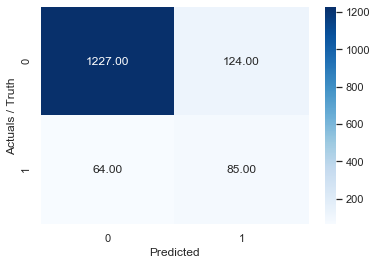

In [222]:
# Check the overall accuracy of the model on scaled data set
print ('Accuracy of the model : ', round(metrics.accuracy_score(y_test, GNB_test_predict)*100,2), '% \n\n')

#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, GNB_test_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, GNB_test_predict)
print (cm)
print ("\n")

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The overall accuracy of the model is way less than that of Logistic Regression models. The recall of class - 1 is also 57% which is less than the recall obtained by Logistic Regression with Standard Scaler</b> <br/><br/>
<b>64 customers were predicted as non-buyers but they actual bought personal loan</b><br>
<b>124 customers were predicted as buyers of personal loan but they actually didn't take the loan</b>

### ROC curve

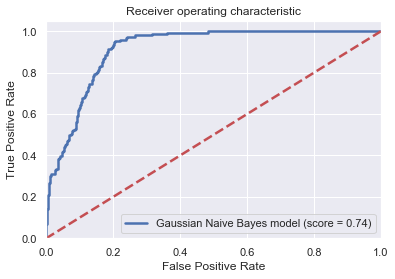



Area under the ROC curve :  91.55 %


In [223]:
from sklearn.metrics import roc_auc_score, roc_curve, auc 
gnb_roc_auc = roc_auc_score(y_test, GNB_test_predict)
fpr2, tpr2, thresholds2 = roc_curve(y_test, GNB_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Gaussian Naive Bayes model (score = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naive-Bayes')
plt.show()

print ("\n\nArea under the ROC curve : ", round(auc(fpr2, tpr2)*100,2),'%')

### 5.4 Naive Bayes with Standard Scaler Classification Model

In [224]:
# create the model
GNB_std_model = GaussianNB()

# Fit the model on training data set
GNB_std_model.fit(xtrainsc, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [225]:
print ("Score of [Training] data set  : ",round(GNB_std_model.score(xtrainsc, y_train),2))

Score of [Training] data set  :  0.89


In [226]:
# Predict on test data set
GNB_std_test_predict = GNB_std_model.predict(xtestsc)

In [227]:
print ("Score of [Test] data set      : ",round(GNB_std_model.score(xtestsc, y_test),2))

Score of [Test] data set      :  0.87


Accuracy of the model :  87.2 % 


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



[[1224  127]
 [  65   84]]




Text(30.5, 0.5, 'Actuals / Truth')

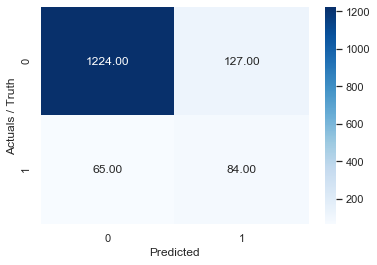

In [228]:
# Check the overall accuracy of the model on scaled data set
print ('Accuracy of the model : ', round(metrics.accuracy_score(y_test, GNB_std_test_predict)*100,2), '% \n\n')

#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, GNB_std_test_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, GNB_std_test_predict)
print (cm)
print ("\n")

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The overall accuracy of the model and the recall of class - 1 is almost same as the Gaussian Nive Bayes' model on non-standardized data.</b><br/><br/>
<b>65 customers were predicted as non-buyers but they actual bought personal loan</b><br>
<b>127 customers were predicted as buyers of personal loan but they actually didn't take the loan</b>

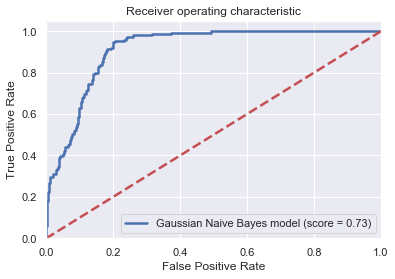



Area under the ROC curve :  91.45 %


In [229]:
from sklearn.metrics import roc_auc_score, roc_curve, auc 
gnb_std_roc_auc = roc_auc_score(y_test, GNB_std_test_predict)
fpr3, tpr3, thresholds3 = roc_curve(y_test, GNB_std_model.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr3, tpr3, label='Gaussian Naive Bayes model (score = %0.2f)' % gnb_std_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naive-Bayes-Standard-dataset')
plt.show()

print ("\n\nArea under the ROC curve : ", round(auc(fpr3, tpr3)*100,2),'%')

### 5.5 K-Nearest Neighbours Classification Model

In [230]:
from sklearn.neighbors import KNeighborsClassifier

# create the model
KNN_model = KNeighborsClassifier(n_neighbors= 3, weights = 'distance')

# Fit the model on training data set
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [231]:
print ("Score of [Training] data set  : ",round(KNN_model.score(X_train, y_train),2))

Score of [Training] data set  :  1.0


In [232]:
# Predict on test data set
KNN_test_predict = KNN_model.predict(X_test)

In [233]:
print ("Score of [Test] data set      : ",round(KNN_model.score(X_test, y_test),2))

Score of [Test] data set      :  0.91


Accuracy of the model :  91.13 % 


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1351
           1       0.58      0.40      0.47       149

    accuracy                           0.91      1500
   macro avg       0.76      0.68      0.71      1500
weighted avg       0.90      0.91      0.90      1500



[[1308   43]
 [  90   59]]




Text(30.5, 0.5, 'Actuals / Truth')

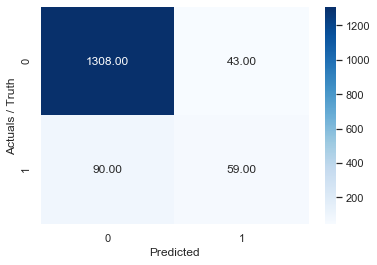

In [234]:
# Check the overall accuracy of the model on scaled data set
print ('Accuracy of the model : ', round(metrics.accuracy_score(y_test, KNN_test_predict)*100,2), '% \n\n')

#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, KNN_test_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, KNN_test_predict)
print (cm)
print ("\n")

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The overall accuracy of the model is less than that of Logistic Regression models but better than Naive Bayes model. The recall of class - 1 is only 40% which is less than the recall obtained by Logistic Regression with Standard Scaler</b><br/><br/>
<b>90 customers were predicted as non-buyers but they actual bought personal loan</b><br>
<b>43 customers were predicted as buyers of personal loan but they actually didn't take the loan</b>

### ROC curve

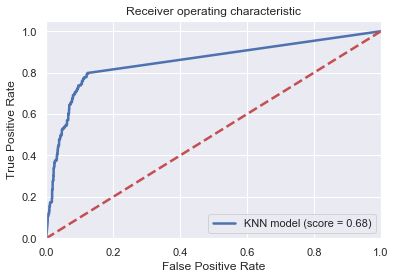



Area under the ROC curve :  85.36 %


In [235]:
from sklearn.metrics import roc_auc_score, roc_curve, auc 
knn_roc_auc = roc_auc_score(y_test, KNN_test_predict)
fpr4, tpr4, thresholds4 = roc_curve(y_test, KNN_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr4, tpr4, label='KNN model (score = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('K-Nearest Neighbours')
plt.show()

print ("\n\nArea under the ROC curve : ", round(auc(fpr4, tpr4)*100,2),'%')

### 5.6 K-Nearest Neighbours with Standard Scaler Classification Model

In [236]:
# create the model
KNN_std_model = KNeighborsClassifier(n_neighbors= 3, weights = 'distance')

# Fit the model on Standardized training data set
KNN_std_model.fit(xtrainsc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [237]:
print ("Score of [Training] data set : ",round(KNN_std_model.score(xtrainsc, y_train),2))

Score of [Training] data set :  1.0


In [238]:
# Predict on scaled test data set
KNN_test_std_predict = KNN_std_model.predict(xtestsc)

In [239]:
print ("Score of [Test] data set     : ",round(KNN_std_model.score(xtestsc, y_test),2))

Score of [Test] data set     :  0.96


Accuracy of the model :  95.87 % 


Classification Report :
-----------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



[[1341   10]
 [  52   97]]




Text(30.5, 0.5, 'Actuals / Truth')

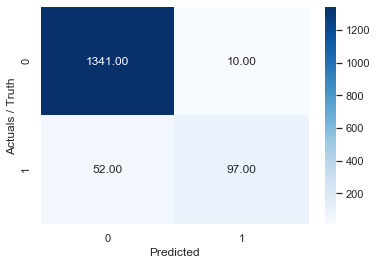

In [240]:
# Check the overall accuracy of the model on scaled data set
print ('Accuracy of the model : ', round(metrics.accuracy_score(y_test, KNN_test_std_predict)*100,2), '% \n\n')

#Print the classification report
print ("Classification Report :")
print ("-----------------------")
print (metrics.classification_report(y_test, KNN_test_std_predict))
print ("\n")

#Print the Confusion matrix
cm = metrics.confusion_matrix(y_test, KNN_test_std_predict)
print (cm)
print ("\n")

sns.heatmap(cm, annot=True, fmt='.2f',  cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]);
plt.xlabel('Predicted')
plt.ylabel('Actuals / Truth')

<b>The overall accuracy of the model is the highest so far and the recall of class - 1 is 65% after the data set was standardized</b><br/><br/>
<b>52 customers were predicted as non-buyers but they actual bought personal loan</b><br>
<b>10 customers were predicted as buyers of personal loan but they actually didn't take the loan</b>

### ROC Curve

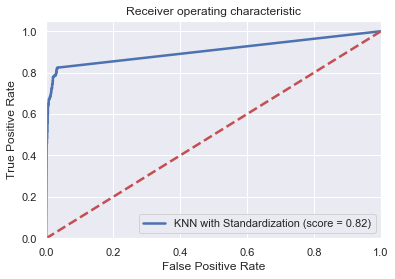



Area under the ROC curve :  90.47 %


In [241]:
from sklearn.metrics import roc_auc_score, roc_curve, auc 
knn_std_roc_auc = roc_auc_score(y_test, KNN_test_std_predict)
fpr5, tpr5, thresholds5 = roc_curve(y_test, KNN_std_model.predict_proba(xtestsc)[:,1])
plt.figure()
plt.plot(fpr5, tpr5, label='KNN with Standardization (score = %0.2f)' % knn_std_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC_Std')
plt.show()

print ("\n\nArea under the ROC curve : ", round(auc(fpr5, tpr5)*100,2),'%')

## 6. Print Confussion Matrix for all the Model

<b>The Confussion Matrix for each of the models is printed inline for the corresponding models.</b>

## 7. Conclusion

<table><head><tr><td> <b>Model Name</b><td> <b>Model Accuracy on Test Data </b></td><td><b>Class -1 Precision</b></td><td><b>Class-1 Recall</b></td><td><b>Class-1 F1 Score</b></td><td><b>Area Under Curve (Test Data)</b></tr></head>
<tr><td>Logistic Regression Classifier</td><td>94.27 %</td><td>0.85</td><td>0.51</td><td>0.64</td><td>95.23 %</td></tr>
<tr><td>Logistic Regression Classifier with Standard Scaler</td><td>94.80 %</td><td>0.84</td><td>0.59</td><td>0.69</td><td>95.36 %</td></tr>
<tr><td>Naive Bayes' Classifier</td><td>87.47 %</td><td>0.41</td><td>0.57</td><td>0.47</td><td>91.55 %</td></tr>
<tr><td>Naive Bayes' Classifier with Standard Scaler</td><td>87.20 %</td><td>0.40</td><td>0.56</td><td>0.47</td><td>91.45 %</td></tr>
<tr><td>K-Nearest Neighbours Classifier</td><td>91.13 %</td><td>0.58</td><td>0.40</td><td>0.47</td><td>85.36 %</td></tr>
<tr><td>K-Nearest Neighbours Classifier with Standard Scaler</td><td>95.87 %</td><td>0.91</td><td>0.65</td><td>0.76</td><td>90.47 %</td></tr>
<table>

<b>Clearly the Accuracy, Precision and Recall of Class-1 and the F1 score of KNN on Standardized Data-set is the highest.</b><br/><br/>
<b>So the KNN with Standardized data-set and K=3 nailed it</b>